In [131]:
import pysm3
import pysm3.units as u
from pysm3 import models
import healpy as hp
import numpy as np
import toml

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## Dust Model

In [ ]:
# yaml file - /bigdata/aankit/cmb-ml/cmbml/cfg/model/sim/sim_flex_fgs.yaml

nside = 2048
freq = 545
sky = pysm3.Sky(nside=nside, preset_strings=["d9"]) 
map_dust_default = sky.get_emission(freq * u.GHz)  


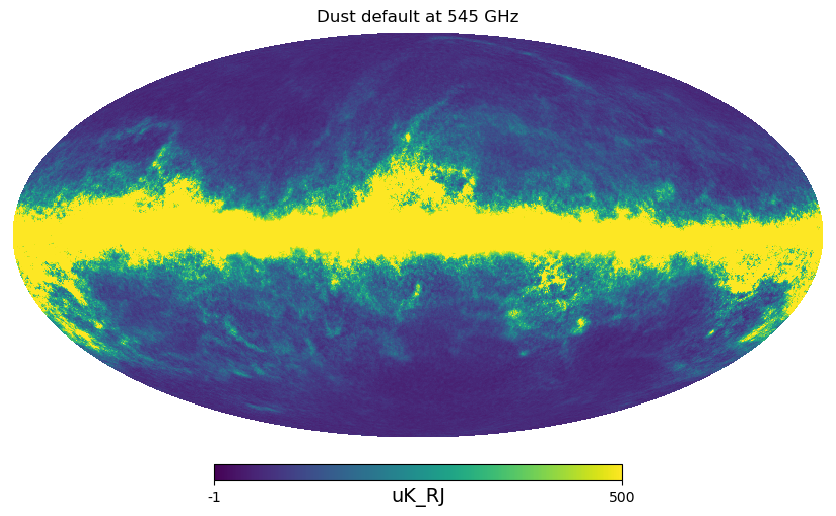

In [202]:

hp.mollview(map_dust_default[0], title=f"Dust default at {freq} GHz", unit=map_dust_default.unit, min = -1, max = 500)
plt.show()


## Modified Dust

In [206]:
nside = 2048
# 10% plus minus of 1.48 is 1.628 & 1.332 and 19.6 is 17.64 & 21.56
dust_component1 = models.ModifiedBlackBody(
    nside=nside,
    map_I=f"dust_gnilc/gnilc_dust_template_nside2048_2023.02.10.fits",
    map_mbb_index=1.332, # 10% lower bound
    map_mbb_temperature=19.6, #default
    unit_mbb_temperature="K",
    freq_ref_I="353 GHz",
    freq_ref_P="353 GHz"
)

dust_component2 = models.ModifiedBlackBody(
    nside=nside,
    map_I=f"dust_gnilc/gnilc_dust_template_nside2048_2023.02.10.fits",
    map_mbb_index=1.628, # 10% upper bound
    map_mbb_temperature=19.6, #default
    unit_mbb_temperature="K",
    freq_ref_I="353 GHz",
    freq_ref_P="353 GHz"
)

dust_component3 = models.ModifiedBlackBody(
    nside=nside,
    map_I=f"dust_gnilc/gnilc_dust_template_nside2048_2023.02.10.fits",
    map_mbb_index=1.48, # default
    map_mbb_temperature=17.64,  # 10% lower bound
    unit_mbb_temperature="K",
    freq_ref_I="353 GHz",
    freq_ref_P="353 GHz"
)

dust_component4 = models.ModifiedBlackBody(
    nside=nside,
    map_I=f"dust_gnilc/gnilc_dust_template_nside2048_2023.02.10.fits",
    map_mbb_index=1.48, # default 
    map_mbb_temperature=21.56,  # 10% upper bound
    unit_mbb_temperature="K",
    freq_ref_I="353 GHz",
    freq_ref_P="353 GHz"
)


In [207]:
sky1 = pysm3.Sky(nside=nside, component_objects=[dust_component1])
sky2 = pysm3.Sky(nside=nside, component_objects=[dust_component2])
sky3 = pysm3.Sky(nside=nside, component_objects=[dust_component3])
sky4 = pysm3.Sky(nside=nside, component_objects=[dust_component4])

sky_map_param1 = sky1.get_emission(freq * u.GHz)  
sky_map_param2 = sky2.get_emission(freq * u.GHz)  
sky_map_param3 = sky3.get_emission(freq * u.GHz)  
sky_map_param4 = sky4.get_emission(freq * u.GHz)  




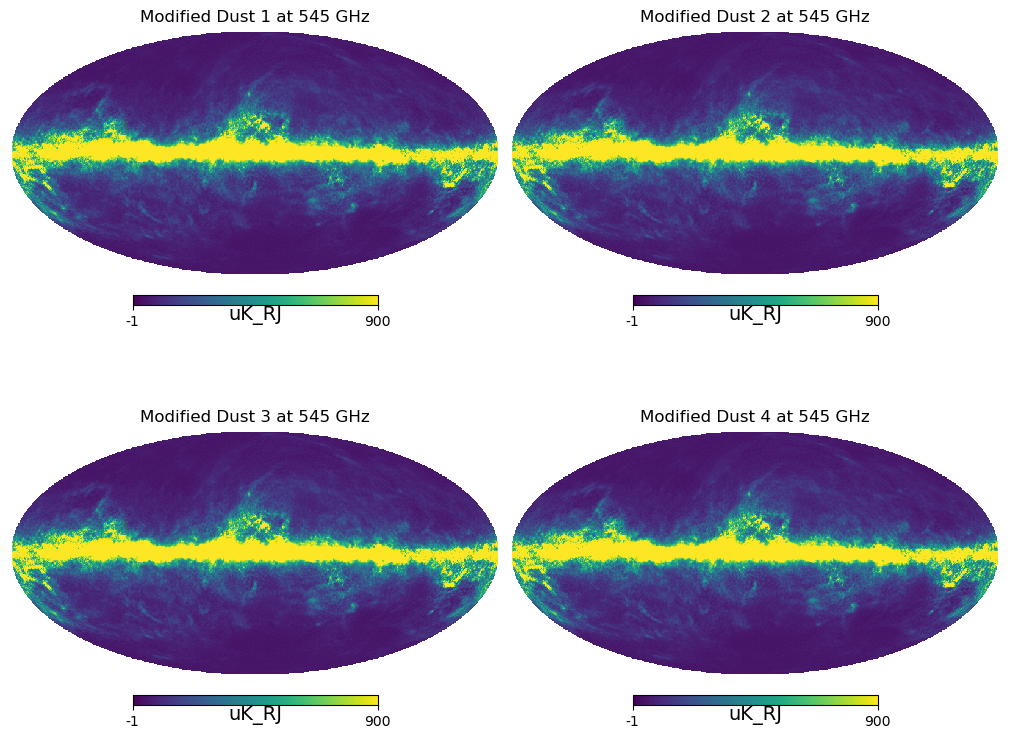

In [212]:
plt.figure(figsize=(10, 8))

hp.mollview(sky_map_param1[0], sub=(2,2,1), title=f"Modified Dust 1 at {freq} GHz", unit=sky_map_param1.unit, min = -1, max = 900)
hp.mollview(sky_map_param1[0], sub=(2,2,2), title=f"Modified Dust 2 at {freq} GHz", unit=sky_map_param1.unit, min = -1, max = 900)
hp.mollview(sky_map_param1[0], sub=(2,2,3), title=f"Modified Dust 3 at {freq} GHz", unit=sky_map_param1.unit, min = -1, max = 900)
hp.mollview(sky_map_param1[0], sub=(2,2,4), title=f"Modified Dust 4 at {freq} GHz", unit=sky_map_param1.unit, min = -1, max = 900)


plt.show()

## Difference of the maps

In [245]:
difference1 = map_dust_default[0] - sky_map_param1[0]
v1 = np.percentile(np.abs((difference1).value), 99)
difference2 = map_dust_default[0] - sky_map_param2[0]
v2 = np.percentile(np.abs((difference2).value), 99)
difference3 = map_dust_default[0] - sky_map_param3[0]
v3 = np.percentile(np.abs((difference3).value), 99)
difference4 = map_dust_default[0] - sky_map_param4[0]
v4 = np.percentile(np.abs((difference4).value), 99)

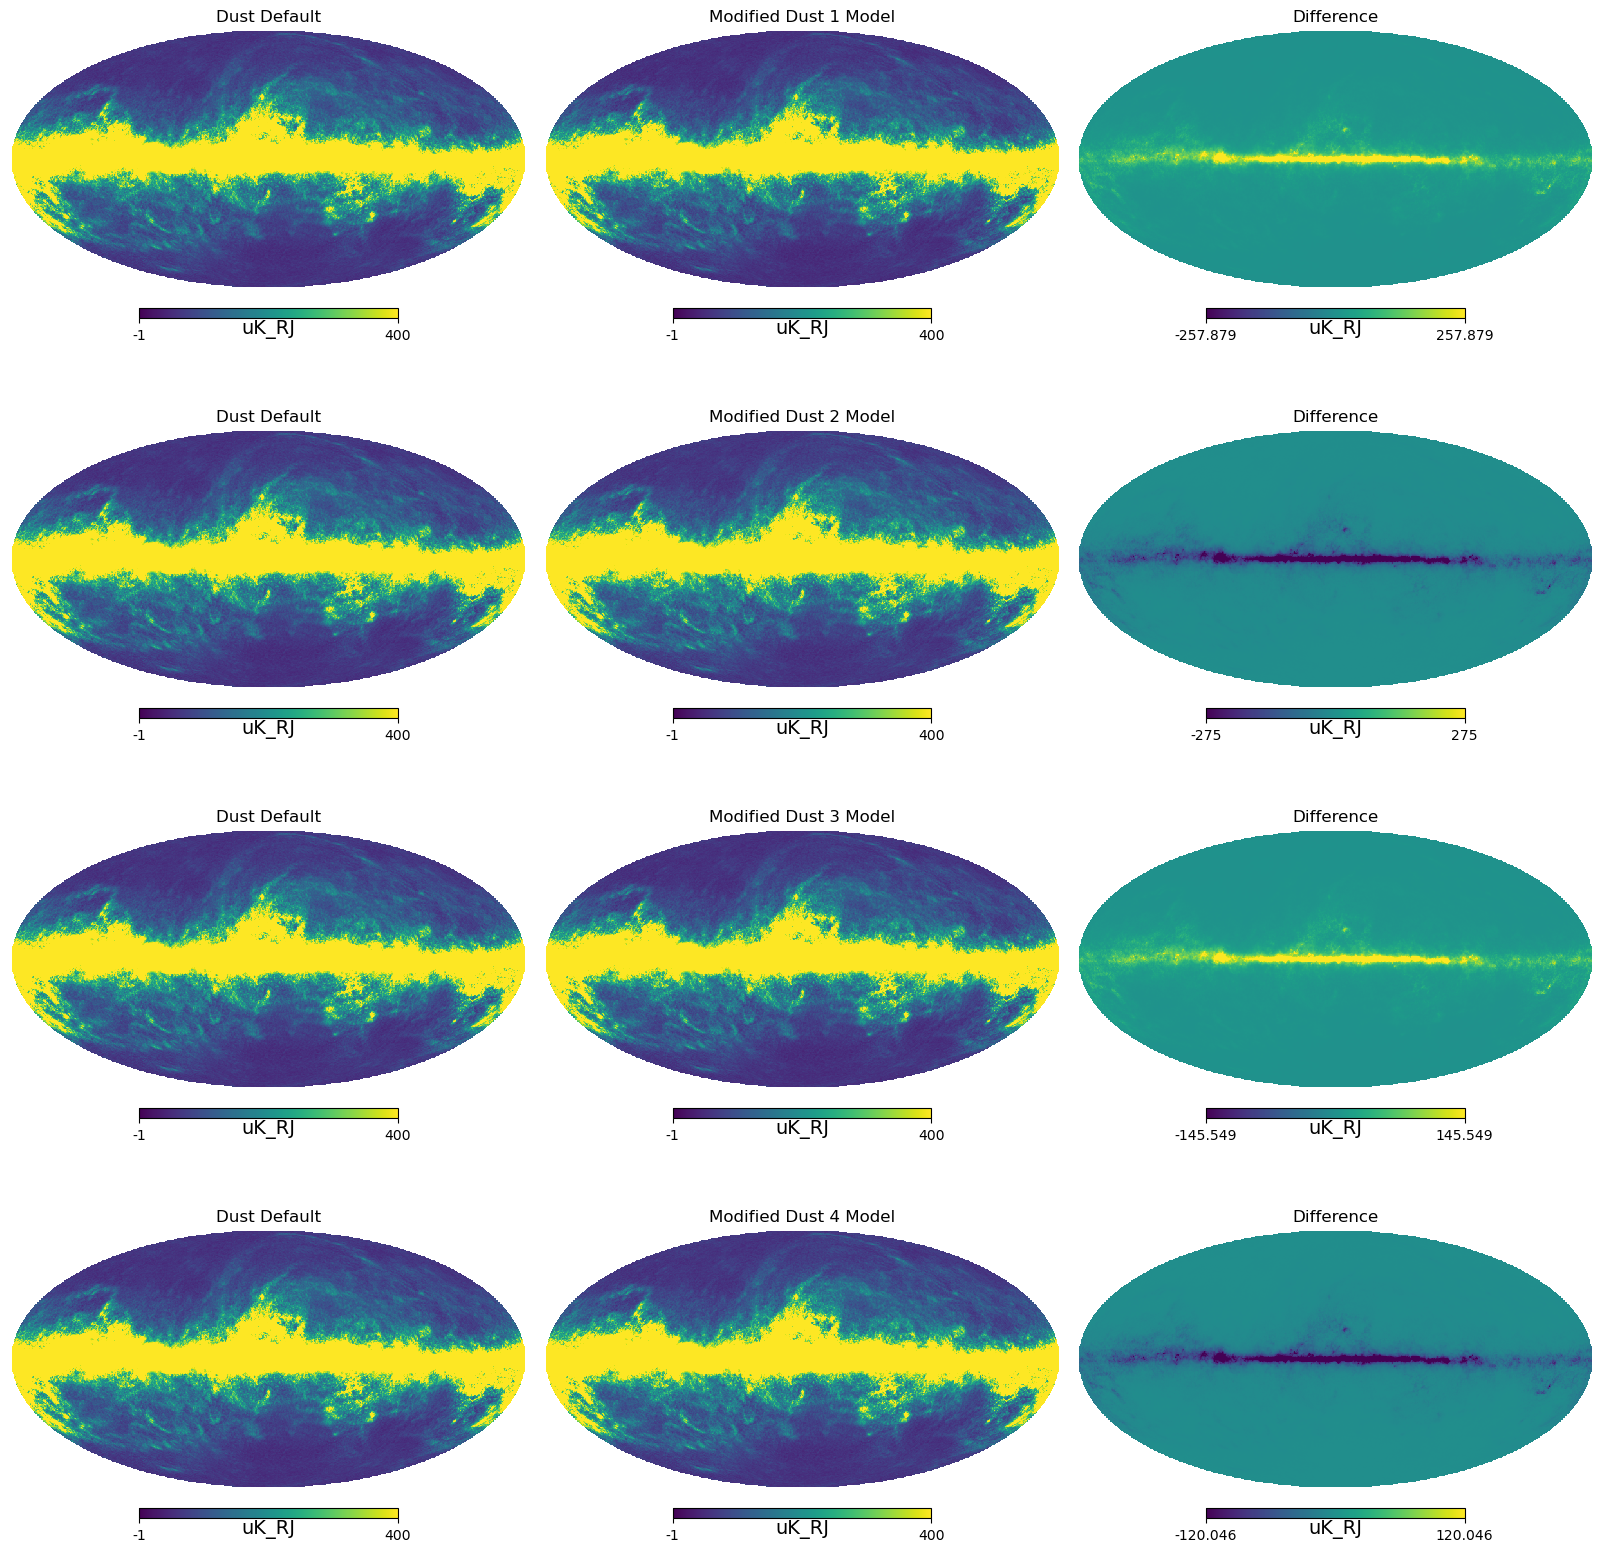

In [247]:

plt.figure(figsize=(16, 16))
#Dust1
hp.mollview(map_dust_default[0], 
            title="Dust Default", 
            sub=(4, 3, 1),
            unit=sky_map_param1.unit, 
            min = -1, 
            max = 400)
hp.mollview(sky_map_param1[0], 
            title="Modified Dust 1 Model", 
            sub=(4, 3, 2),
            unit=sky_map_param1.unit, 
            min = -1, 
            max = 400)
hp.mollview(difference1, 
            title="Difference", 
            sub=(4, 3, 3),
            unit=sky_map_param1.unit, 
            min = -v1, 
            max = v1)
#Dust2
hp.mollview(map_dust_default[0], 
            title="Dust Default", 
            sub=(4, 3, 4),
            unit=sky_map_param2.unit, 
            min = -1, 
            max = 400)
hp.mollview(sky_map_param2[0], 
            title="Modified Dust 2 Model", 
            sub=(4, 3, 5),
            unit=sky_map_param2.unit, 
            min = -1, 
            max = 400)
hp.mollview(difference2, 
            title="Difference", 
            sub=(4, 3, 6),
            unit=sky_map_param2.unit, 
            min = -v2, 
            max = v2)
#Dust3
hp.mollview(map_dust_default[0], 
            title="Dust Default", 
            sub=(4, 3, 7),
            unit=sky_map_param3.unit, 
            min = -1, 
            max = 400)
hp.mollview(sky_map_param3[0], 
            title="Modified Dust 3 Model", 
            sub=(4, 3, 8),
            unit=sky_map_param3.unit, 
            min = -1, 
            max = 400)
hp.mollview(difference3, 
            title="Difference", 
            sub=(4, 3, 9),
            unit=sky_map_param1.unit, 
            min = -v3, 
            max = v3)
#Dust4
hp.mollview(map_dust_default[0], 
            title="Dust Default", 
            sub=(4, 3, 10),
            unit=sky_map_param3.unit, 
            min = -1, 
            max = 400)
hp.mollview(sky_map_param4[0], 
            title="Modified Dust 4 Model", 
            sub=(4, 3, 11),
            unit=sky_map_param4.unit, 
            min = -1, 
            max = 400)
hp.mollview(difference4, 
            title="Difference", 
            sub=(4, 3, 12),
            unit=sky_map_param4.unit, 
            min = -v4, 
            max = v4)

plt.show()

In [248]:
m1 = map_dust_default[0].value.flatten()
m2 = sky_map_param2[0].value.flatten()
diff = m1 - m2

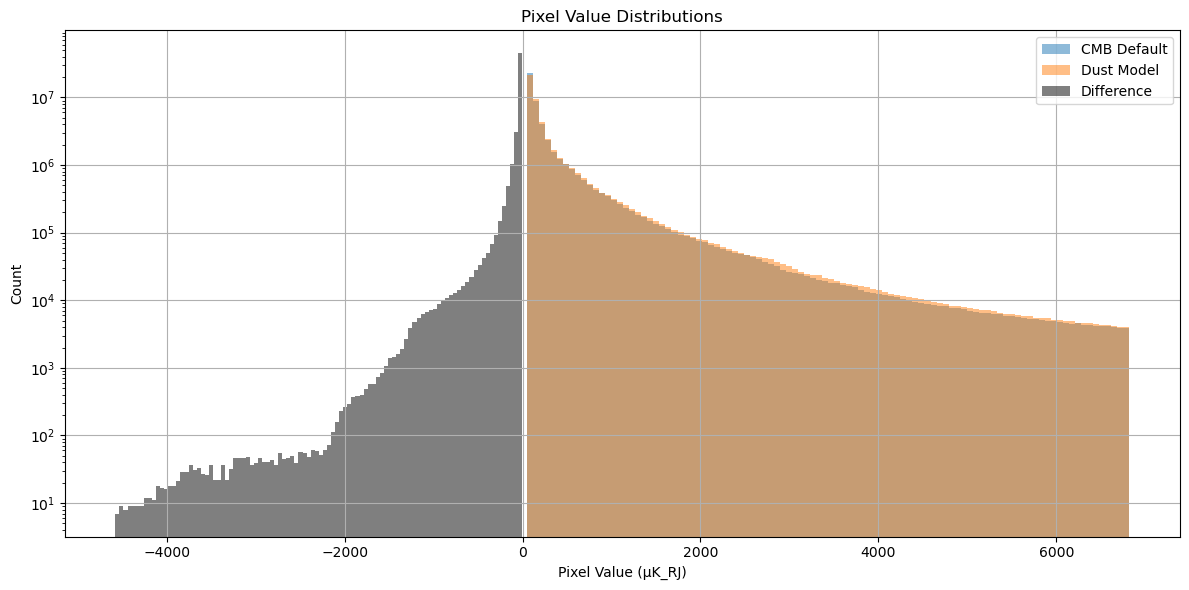

In [249]:
#only taking middle 99% of the pixel values for better visualization
vmin, vmax = np.percentile(m1, [0.5, 99.5])

plt.figure(figsize=(12, 6))

#turn these on or off to see the difference
plt.hist(m1, bins=100, alpha=0.5, label="CMB Default", range=(vmin, vmax), log=True) 
plt.hist(m2, bins=100, alpha=0.5, label="Dust Model", range=(vmin, vmax), log=True)
plt.hist(diff, bins=100, alpha=0.5, label="Difference", color='black', log=True)

plt.xlabel("Pixel Value (μK_RJ)")
plt.ylabel("Count")
plt.title("Pixel Value Distributions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [224]:
# statistical tests
from scipy.stats import ttest_rel, mannwhitneyu, ks_2samp

print("Mean difference:", np.mean(diff))
print("Std deviation of difference:", np.std(diff))

t_stat, t_p = ttest_rel(m1, m2)
print("Paired t-test p-value:", t_p)

ks_stat, ks_p = ks_2samp(m1, m2)
print("KS test p-value:", ks_p)

u_stat, u_p = mannwhitneyu(m1, m2, alternative='two-sided')
print("Mann-Whitney U test p-value:", u_p)


Mean difference: 13.440003630979648
Std deviation of difference: 37.82917445067286
Paired t-test p-value: 0.0
KS test p-value: 0.0
Mann-Whitney U test p-value: 0.0


## Modified Free-Free

In [250]:
nside = 2048
freq = 150
sky = pysm3.Sky(nside=nside, preset_strings=["f1"])


In [251]:
map_ff_default = sky.get_emission(freq * u.GHz)  # Simulate at 150 GHz

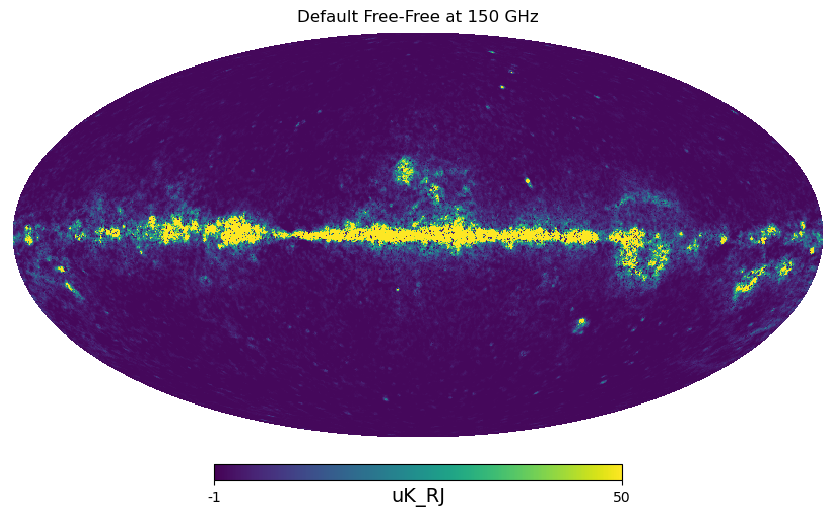

In [252]:
hp.mollview(map_ff_default[0], title=f"Default Free-Free at {freq} GHz", unit=map_ff_default.unit, min = -1, max = 50)
plt.show()

In [ ]:
# 10% of -2.14 plus or minus gives -2.14 +/- 0.214 = -1.926 to -2.354
ff_preset_string1 = """
[f1]
class= "PowerLaw"
map_I= "pysm_2/ff_t_new.fits"
unit_I= "uK_RJ"
map_pl_index= -1.926
freq_ref_I= "30 GHz"
has_polarization= false
"""
ff_preset_string2 = """
[f1]
class= "PowerLaw"
map_I= "pysm_2/ff_t_new.fits"
unit_I= "uK_RJ"
map_pl_index= -2.354
freq_ref_I= "30 GHz"
has_polarization= false
"""

In [226]:
ff_toml1 = {"ff": toml.loads(ff_preset_string1)}
ff_toml2 = {"ff": toml.loads(ff_preset_string2)}

In [227]:
ff_sky1 = pysm3.sky.create_components_from_config(ff_toml1, nside=nside, map_dist=None)
ff_sky2 = pysm3.sky.create_components_from_config(ff_toml2, nside=nside, map_dist=None)

In [228]:
map_ff_param1 = ff_sky1[0].get_emission(freq * u.GHz)
map_ff_param2 = ff_sky2[0].get_emission(freq * u.GHz)


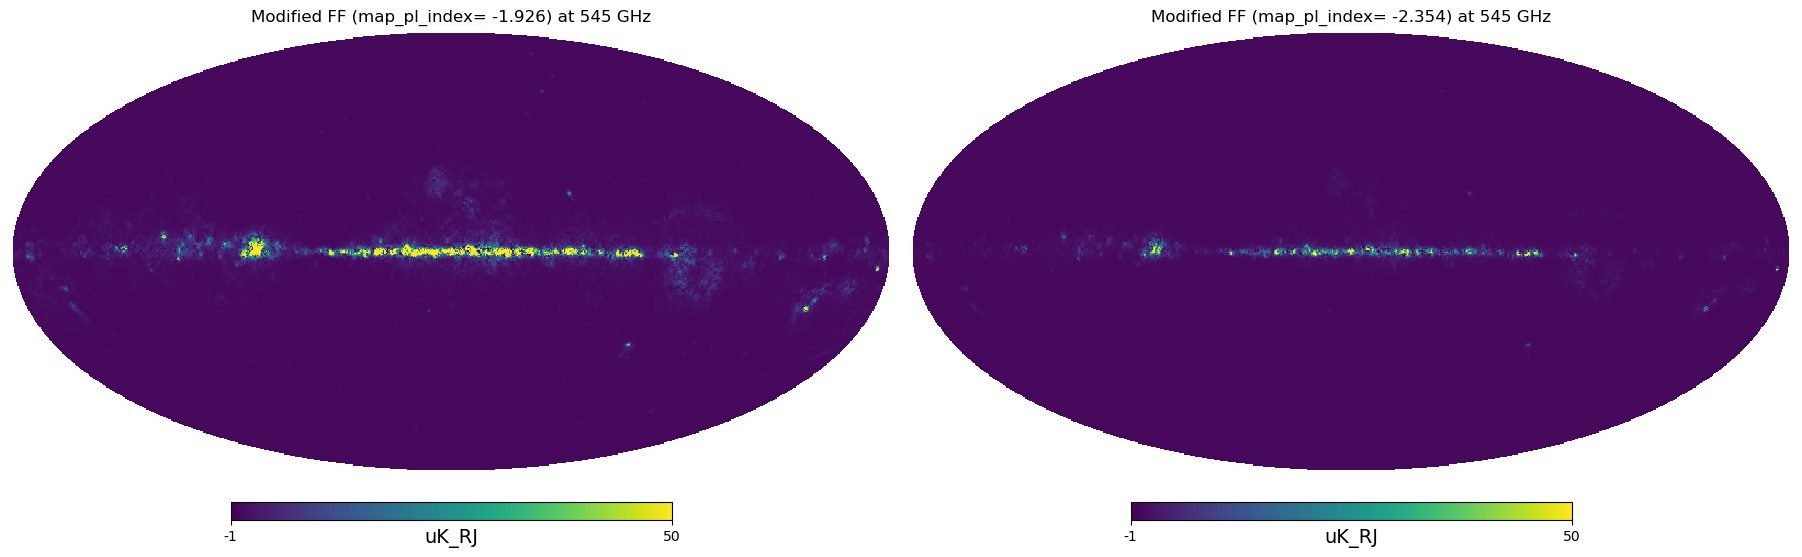

In [229]:
plt.figure(figsize=(18, 6))
hp.mollview(map_ff_param1[0],sub=(1,2,1), title=f"Modified FF (map_pl_index= -1.926) at {freq} GHz", unit=sky_map_param1.unit, min = -1, max = 50)
hp.mollview(map_ff_param2[0],sub=(1,2,2), title=f"Modified FF (map_pl_index= -2.354) at {freq} GHz", unit=sky_map_param2.unit, min = -1, max = 50)

plt.show()

## Difference

In [230]:
difference1 = map_ff_default[0] - map_ff_param1[0]
v1 = np.percentile(np.abs((difference1).value), 99)
difference2 = map_ff_default[0] - map_ff_param2[0]
v2 = np.percentile(np.abs((difference2).value), 99)

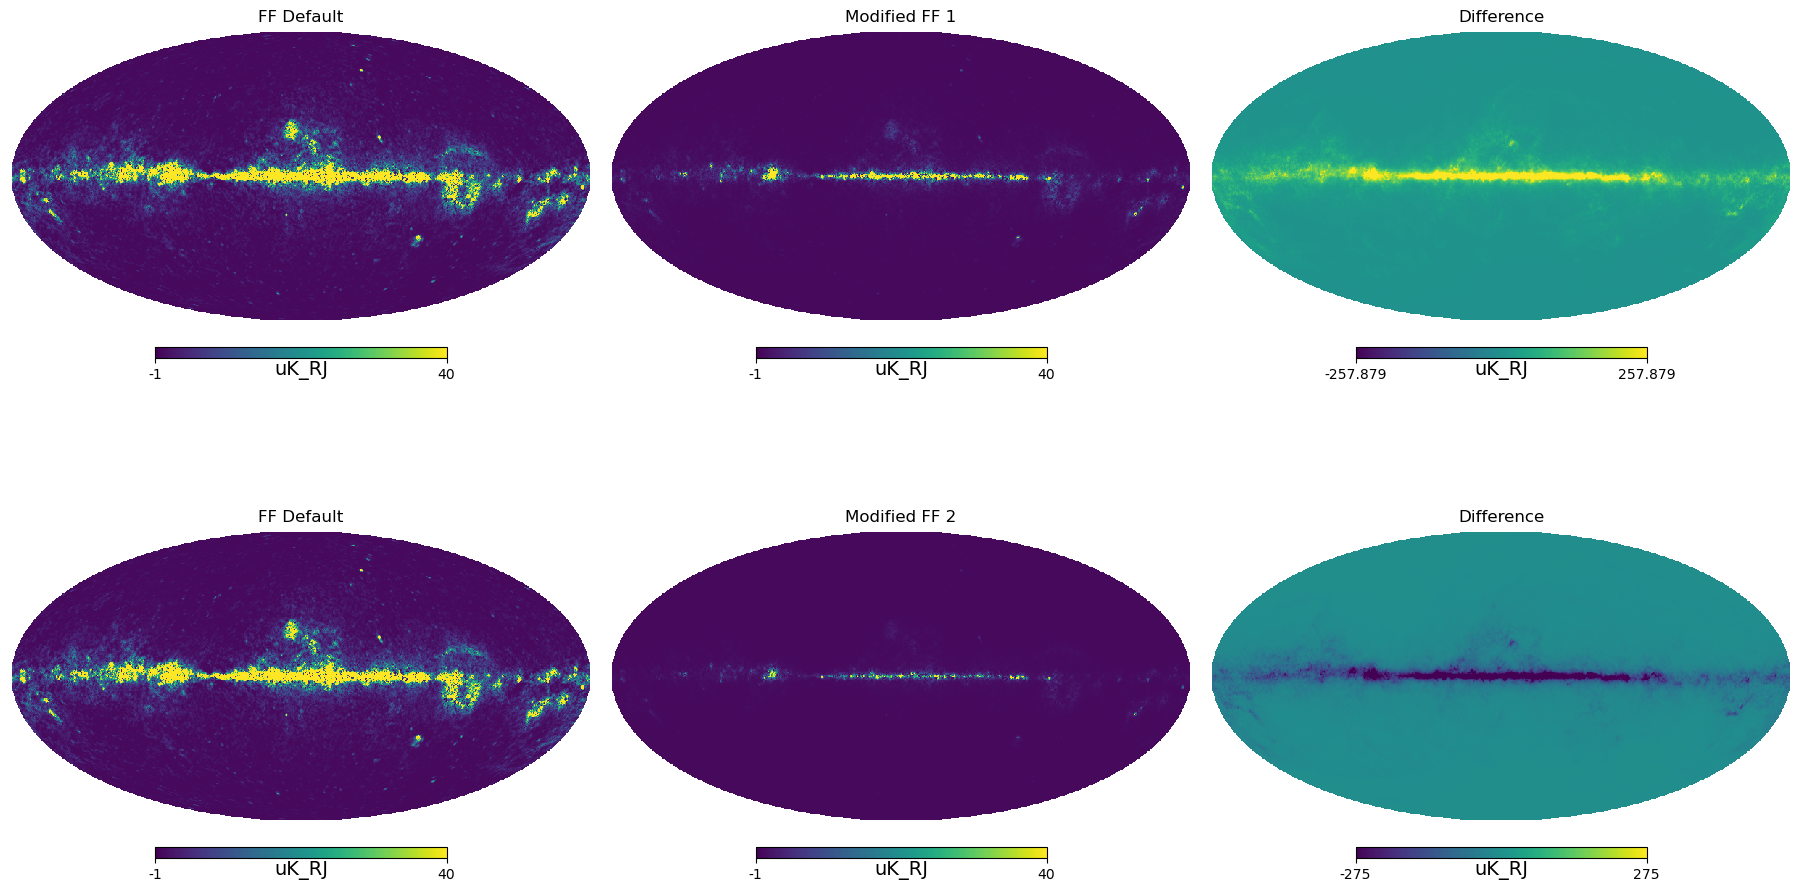

In [253]:

plt.figure(figsize=(18, 10))
# modified FF 1
hp.mollview(map_ff_default[0], 
            title="FF Default", 
            sub=(2, 3, 1),
            unit=sky_map_param1.unit, 
            min = -1, 
            max = 40)
hp.mollview(map_ff_param1[0], 
            title="Modified FF 1", 
            sub=(2, 3, 2),
            unit=sky_map_param1.unit, 
            min = -1, 
            max = 40)

hp.mollview(difference1, 
            title="Difference", 
            sub=(2, 3, 3),
            unit=sky_map_param1.unit, 
            min = -v1, 
            max = v1)

#modified FF 2
hp.mollview(map_ff_default[0], 
            title="FF Default", 
            sub=(2, 3, 4),
            unit=sky_map_param1.unit, 
            min = -1, 
            max = 40)
hp.mollview(map_ff_param2[0], 
            title="Modified FF 2" , 
            sub=(2, 3, 5),
            unit=sky_map_param2.unit, 
            min = -1, 
            max = 40)
hp.mollview(difference2, 
            title="Difference", 
            sub=(2, 3, 6),
            unit=sky_map_param2.unit, 
            min = -v2, 
            max = v2)
plt.show()

In [234]:
m1 = map_ff_default[0].value.flatten()
m2 = map_ff_param1[0].value.flatten()
diff = m1 - m2

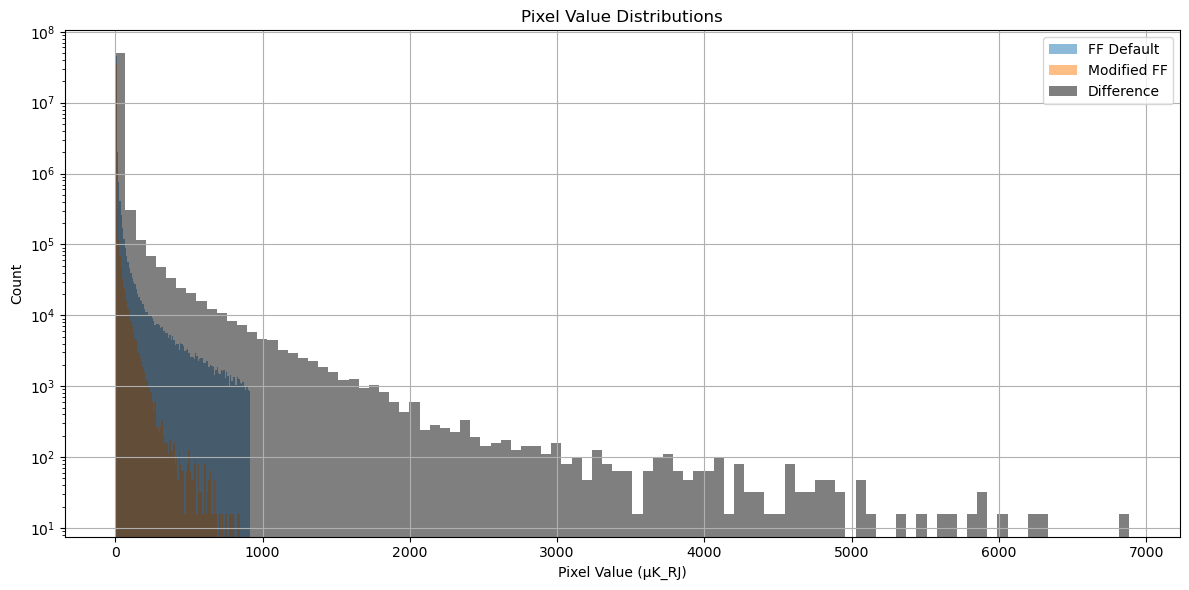

In [243]:
#only taking middle 99% of the pixel values for better visualization
vmin, vmax = np.percentile(m1, [0.5, 99.9])

plt.figure(figsize=(12, 6))

#turn these on or off to see the difference
plt.hist(m1, bins=100, alpha=0.5, label="FF Default", range=(vmin, vmax), log=True) 
plt.hist(m2, bins=100, alpha=0.5, label="Modified FF", range=(vmin, vmax), log=True)
plt.hist(diff, bins=100, alpha=0.5, label="Difference", color='black', log=True)

plt.xlabel("Pixel Value (μK_RJ)")
plt.ylabel("Count")
plt.title("Pixel Value Distributions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [244]:

# statistical tests
from scipy.stats import ttest_rel, mannwhitneyu, ks_2samp

print("Mean difference:", np.mean(diff))
print("Std deviation of difference:", np.std(diff))

t_stat, t_p = ttest_rel(m1, m2)
print("Paired t-test p-value:", t_p)

ks_stat, ks_p = ks_2samp(m1, m2)
print("KS test p-value:", ks_p)

u_stat, u_p = mannwhitneyu(m1, m2, alternative='two-sided')
print("Mann-Whitney U test p-value:", u_p)


Mean difference: 6.710222115886463
Std deviation of difference: 57.443687213252204
Paired t-test p-value: 0.0
KS test p-value: 0.0
Mann-Whitney U test p-value: 0.0
